In [56]:
import random
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from seaborn.palettes import color_palette
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# 1. Import, sample, and split the data

In [2]:
df=pd.read_csv("heart_disease_2015.csv")

In [50]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df_use=df.copy()
# change the datatype of the independent variable into object.
df_use["HeartDiseaseorAttack"] = df_use["HeartDiseaseorAttack"].astype('object')

In [17]:
df_small=df_use.sample(n=10000, random_state=8649)

In [5]:
x= df_use.loc[:,df.columns != "HeartDiseaseorAttack"]
le = LabelEncoder()
y= le.fit_transform(df_use['HeartDiseaseorAttack'])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=8649)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
x_small= df_small.loc[:,df.columns != "HeartDiseaseorAttack"]
le = LabelEncoder()
y_small= le.fit_transform(df_small['HeartDiseaseorAttack'])
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(x_small,y_small, test_size=0.2, random_state=8649)
scaler = StandardScaler()
X_train_small = scaler.fit_transform(X_train_small)
X_test_small = scaler.transform(X_test_small)

In [11]:
X_train.shape

(202944, 21)

# 2. Train the classification models

In [13]:
# Define the classifiers and parameter space
classifiers = [
    ('Logistic Regression',LogisticRegression(),{
        # 'penalty': ['l1', 'l2'],
        'C': [0.1,0.5,1,3],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 500]
    }),
    ('RandomForest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 20, 40],
    }),
    ('GradientBoosting', GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2, 0.5],
        'max_depth': [2, 3, 5, 8]
    }),
    ('XGBoost', XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [4, 6, 8],
    }),
]

In [16]:
print('-'*20)
for name, clf, param_dist in classifiers:
    print(name)
    print(clf)
    print(param_dist)
    print('-'*20)

--------------------
Logistic Regression
LogisticRegression()
{'C': [0.1, 0.5, 1, 3], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 200, 500]}
--------------------
RandomForest
RandomForestClassifier()
{'n_estimators': [50, 100, 200], 'max_depth': [None, 20, 40]}
--------------------
GradientBoosting
GradientBoostingClassifier()
{'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2, 0.5], 'max_depth': [2, 3, 5, 8]}
--------------------
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delt

In [19]:
# Store the best models and their accuracy scores
best_models = {}
best_accuracies = []

# Perform GridSearchCV for each classifier
for name, clf, param_dist in classifiers:
    grid_search =GridSearchCV(clf, param_grid=param_dist, cv=9, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_small, y_train_small)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test_small)
    accuracy = accuracy_score(y_test_small, y_pred)
    best_accuracies.append((name, accuracy))

Fitting 9 folds for each of 60 candidates, totalling 540 fits
Fitting 9 folds for each of 9 candidates, totalling 81 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 27 candidates, totalling 243 fits


In [20]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear'),
 'RandomForest': RandomForestClassifier(max_depth=40, n_estimators=50),
 'GradientBoosting': GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=50),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_

In [21]:
best_accuracies

[('Logistic Regression', 0.9065),
 ('RandomForest', 0.9005),
 ('GradientBoosting', 0.9025),
 ('XGBoost', 0.901)]

In [29]:
feature_list = list(x.columns)

# 3. Find the feature importance of RandomForest, GradientBoosting and XGBoost

In [105]:
best_models['Logistic Regression'].coef_[0]

array([ 2.40457678e-01,  2.47261652e-01,  5.23190029e-02, -8.50375525e-02,
        1.57242325e-01,  2.27965335e-01,  9.89824178e-02,  4.39440134e-02,
        2.80684210e-04,  9.66725643e-02, -8.01196017e-02, -4.93618297e-02,
        9.81447005e-02,  5.55970290e-01,  4.74913609e-02,  5.03804570e-03,
        8.34106412e-02,  3.82891172e-01,  6.68484081e-01,  3.82272031e-02,
       -1.24592391e-01])

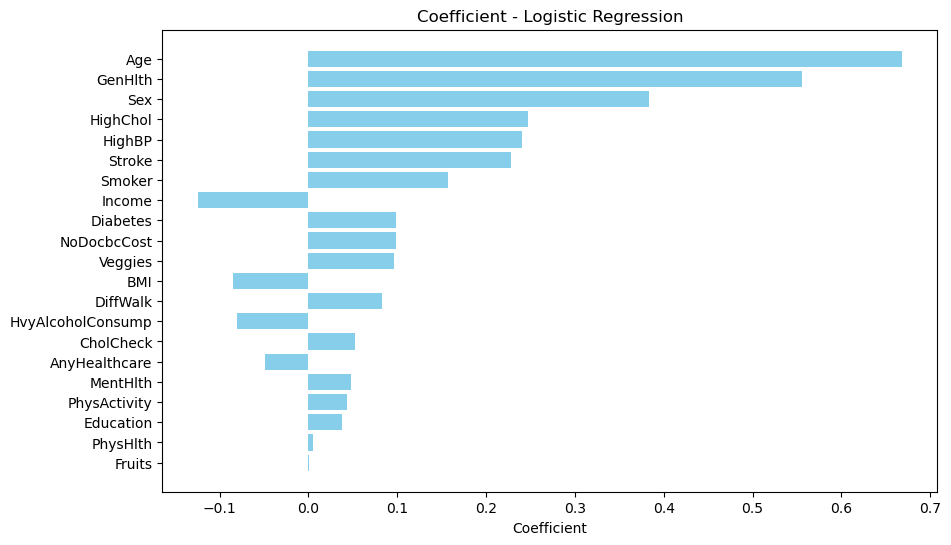

In [106]:
logistic_coefficients = pd.DataFrame({'Feature': feature_list, \
                                         'Coefficient': best_models['Logistic Regression'].coef_[0]})

logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(logistic_coefficients['Feature'], logistic_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Coefficient - Logistic Regression')
plt.gca().invert_yaxis()
plt.savefig('Coefficient - Logistic Regression.png')
plt.show()

Age, GenHlth and sex are the features with the top three highest absolute values of Logistic Regression coefficient.

In [25]:
best_models['RandomForest'].feature_importances_

array([0.03182985, 0.03006103, 0.00450524, 0.14716738, 0.02751103,
       0.03740809, 0.03305546, 0.02823382, 0.03163188, 0.02609263,
       0.00843357, 0.00796363, 0.01832042, 0.09196929, 0.06113056,
       0.07926575, 0.02844142, 0.0318303 , 0.11345452, 0.06763516,
       0.09405898])

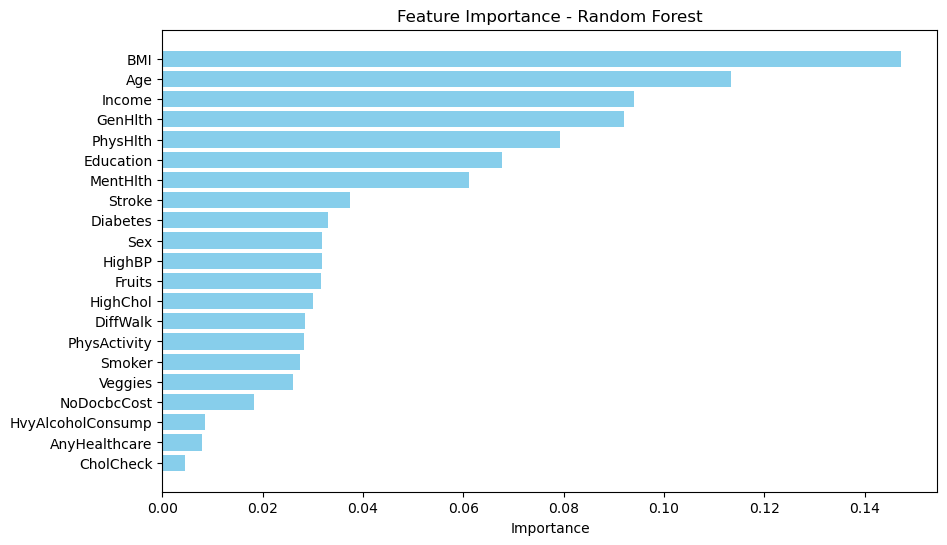

In [100]:
randomforest_importances = pd.DataFrame({'Feature': feature_list, \
                                         'Importance': best_models['RandomForest'].feature_importances_})

randomforest_importances = randomforest_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(randomforest_importances['Feature'], randomforest_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.savefig('feature importance - random forest.png')
plt.show()

The top three features with highest importance based on RandomForest model are BMI, Age and Income.

In [26]:
best_models['GradientBoosting'].feature_importances_

array([0.07114046, 0.04420616, 0.        , 0.        , 0.00384611,
       0.17622167, 0.01655431, 0.00377547, 0.        , 0.        ,
       0.00153532, 0.        , 0.        , 0.38543339, 0.00131717,
       0.0129284 , 0.03992716, 0.05038184, 0.18620526, 0.        ,
       0.00652728])

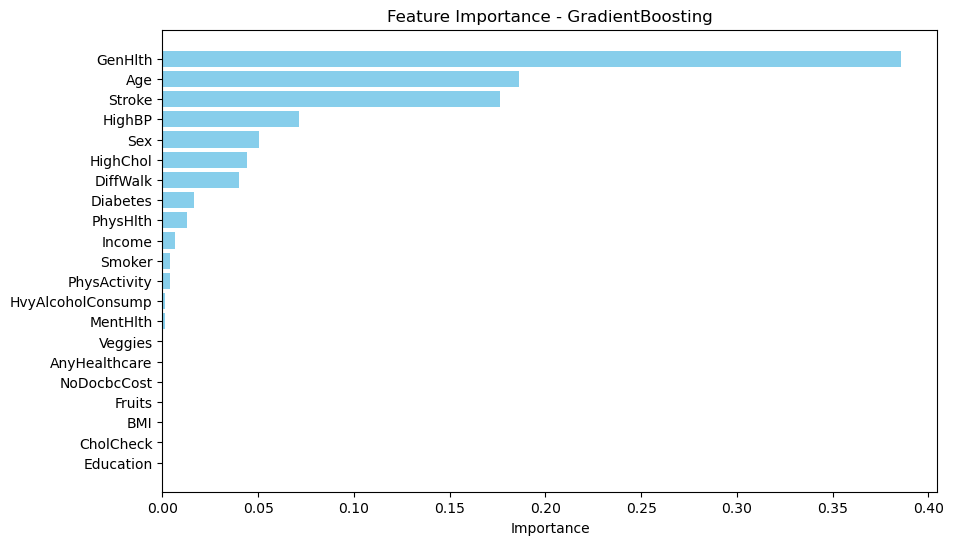

In [101]:
gradientboosting_importances = pd.DataFrame({'Feature': feature_list, \
                                         'Importance': best_models['GradientBoosting'].feature_importances_})

gradientboosting_importances = gradientboosting_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(gradientboosting_importances['Feature'], gradientboosting_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - GradientBoosting')
plt.gca().invert_yaxis()
plt.savefig('feature importance - GradientBoosting.png')
plt.show()

The top three features with highest importance based on GradientBoosting model are GenHlth, Age and Stroke.

In [27]:
best_models['XGBoost'].feature_importances_

array([0.08257436, 0.03879019, 0.02215486, 0.02468675, 0.02574255,
       0.11712476, 0.02607798, 0.02316645, 0.02147033, 0.02703047,
       0.02857355, 0.0255721 , 0.02600398, 0.25085616, 0.02644845,
       0.02562931, 0.02724056, 0.04975235, 0.08158526, 0.02498228,
       0.02453742], dtype=float32)

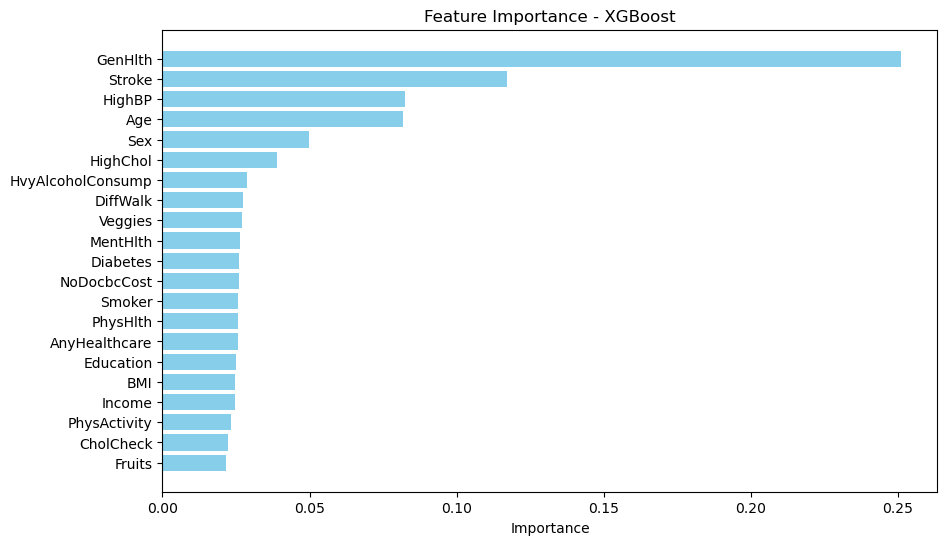

In [102]:
XGBoost_importances = pd.DataFrame({'Feature': feature_list, \
                                         'Importance': best_models['XGBoost'].feature_importances_})

XGBoost_importances = XGBoost_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(XGBoost_importances['Feature'], XGBoost_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.savefig('feature importance - XGBoost.png')
plt.show()

The top three features with highest importance based on XGBoost model are GenHlth, Stroke and HighBP. Actually, the top four features with the highest importance are consistent across both the Gradient Boosting and XGBoost models, indicating a strong agreement between the two models regarding the most influential predictors in the dataset.

# 4. PCA

In [64]:
x_small = df_small.iloc[:,1:]

In [66]:
x_small.isna().sum()

HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

In [67]:
x_small.dtypes

HighBP               float64
HighChol             float64
CholCheck            float64
BMI                  float64
Smoker               float64
Stroke               float64
Diabetes             float64
PhysActivity         float64
Fruits               float64
Veggies              float64
HvyAlcoholConsump    float64
AnyHealthcare        float64
NoDocbcCost          float64
GenHlth              float64
MentHlth             float64
PhysHlth             float64
DiffWalk             float64
Sex                  float64
Age                  float64
Education            float64
Income               float64
dtype: object

In [68]:
scale = StandardScaler()
dat = scale.fit_transform(x_small)
n_comp = len(x_small.columns)
pca = PCA(n_components = n_comp)
comps = pca.fit_transform(dat)

In [69]:
df_tmp = df_small.iloc[:,:1]
df_tmp['pca1'] = comps[:,0]
df_tmp['pca2'] = comps[:,1]

In [73]:
df_tmp['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    9079
1.0     921
Name: count, dtype: int64

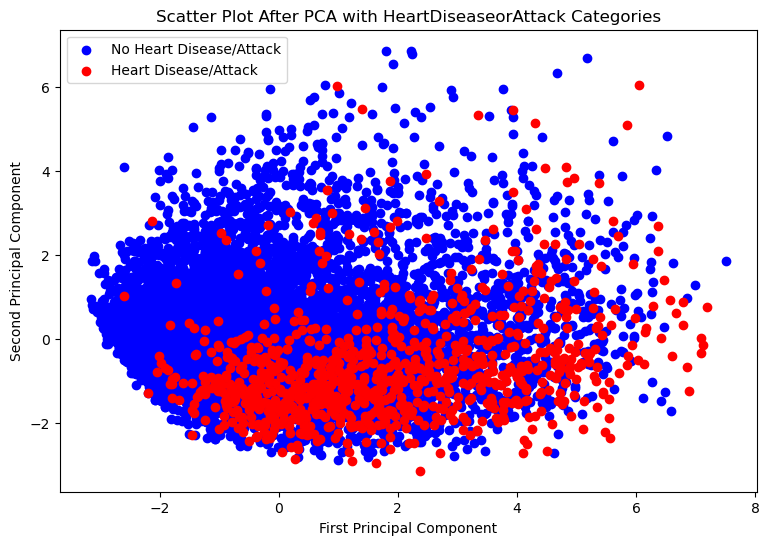

In [99]:
plt.figure(figsize=(9, 6))

# Filter data by category
category_0 = comps[df_tmp.HeartDiseaseorAttack == 0]
category_1 = comps[df_tmp.HeartDiseaseorAttack == 1]

# Create separate scatter plots for each category
scatter_0 = plt.scatter(category_0[:, 0], category_0[:, 1], c='blue', label='No Heart Disease/Attack')
scatter_1 = plt.scatter(category_1[:, 0], category_1[:, 1], c='red', label='Heart Disease/Attack')

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot After PCA with HeartDiseaseorAttack Categories')

# Add legend
plt.legend(handles=[scatter_0, scatter_1])

plt.savefig('PCA scatter plot.png')
# Show plot
plt.show()

This is a scatter plot of a random sample with 10000 records from the whole dataset, where x-axis and y-axis respectively refer to the first and second principal component under PCA analysis. In the visualization, red dots depict patients who have experienced heart disease or a heart attack, whereas blue dots denote individuals without heart problems. According to the plot, although a distinct demarcation between the two groups is absent, there's a noticeable trend where blue points predominantly gather towards the lower left and middle left, while red points seem to amass more on the lower right side.

In [80]:
# Get the eigenvectors (principal components)
eigenvectors = pca.components_

# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Compute the loadings
loadings = eigenvectors.T * np.sqrt(eigenvalues)

In [91]:
loading_df = pd.DataFrame(loadings, index=x_small.columns, columns=[f'PC{i+1}' for i in range(n_comp)])

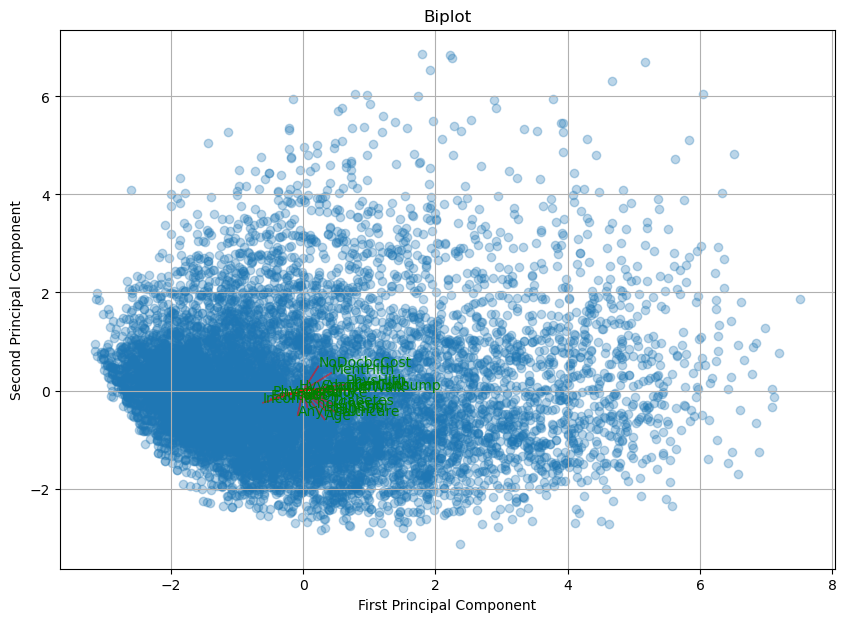

In [90]:
plt.figure(figsize=(10, 7))
plt.scatter(comps[:, 0], comps[:, 1], alpha=0.3)

for i in range(len(loading_df)):
    plt.arrow(0, 0, loading_df.PC1[i], loading_df.PC2[i], color='r', alpha=0.5)
    plt.text(loading_df.PC1[i], loading_df.PC2[i], loading_df.index[i], color='g')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Biplot')
plt.grid(True)
plt.show()

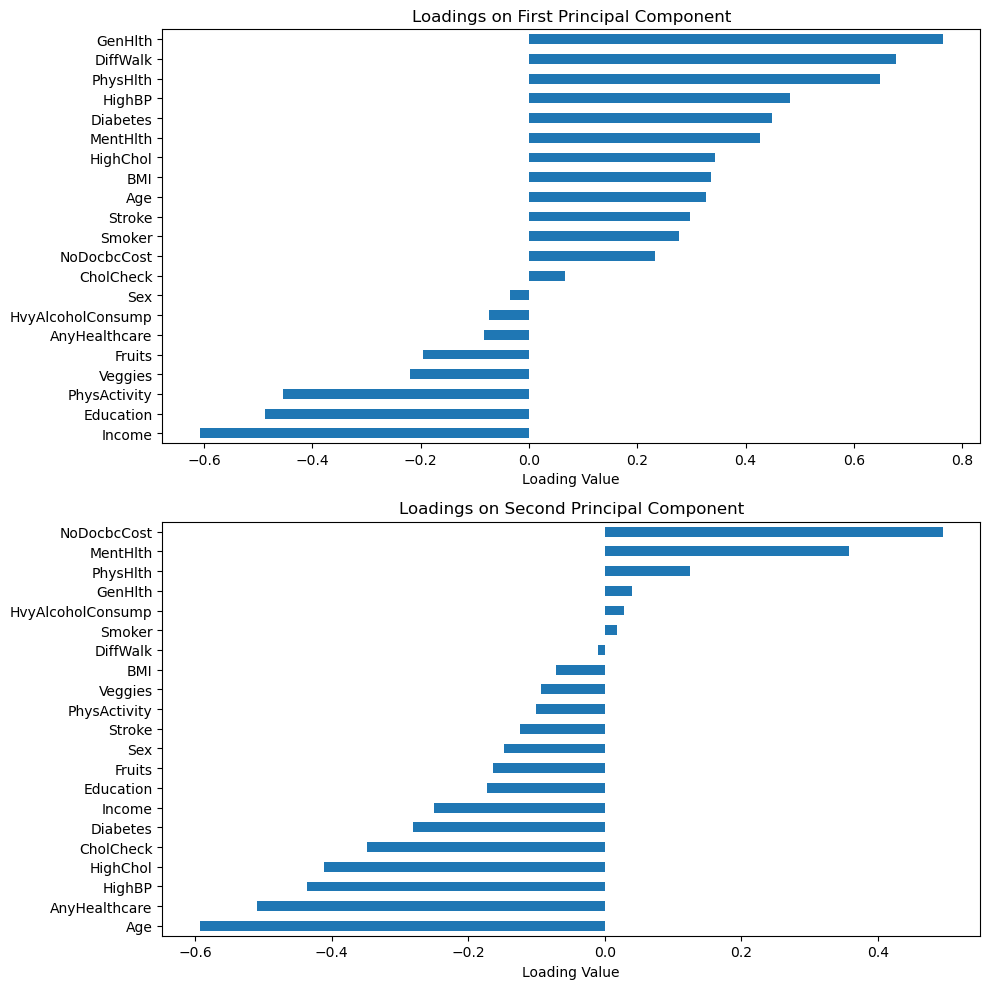

In [98]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# First Principal Component
loading_df['PC1'].sort_values(ascending=True).plot(kind='barh', ax=axs[0])
axs[0].set_title('Loadings on First Principal Component')
axs[0].set_xlabel('Loading Value')

# Second Principal Component
loading_df['PC2'].sort_values(ascending=True).plot(kind='barh', ax=axs[1])
axs[1].set_title('Loadings on Second Principal Component')
axs[1].set_xlabel('Loading Value')

plt.tight_layout()
plt.savefig('PCA Loadings.png')
plt.show()


GenHlth and DiffWalk contribute most to the first principal component, while Age and AnyHealthcare are the major contributors to the second principal component. Interestingly, the features significantly influencing the first principal component exhibit very low absolute loadings on the second principal component and vice versa. This observation highlights a distinct separation in the influence of these features across the two principal components.